In [324]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
df = pd.read_csv("data/01_raw/en.openfoodfacts.org.products.tsv", sep="\t")
df_sample = df.sample(n=10000, random_state=1)



/home/gio/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


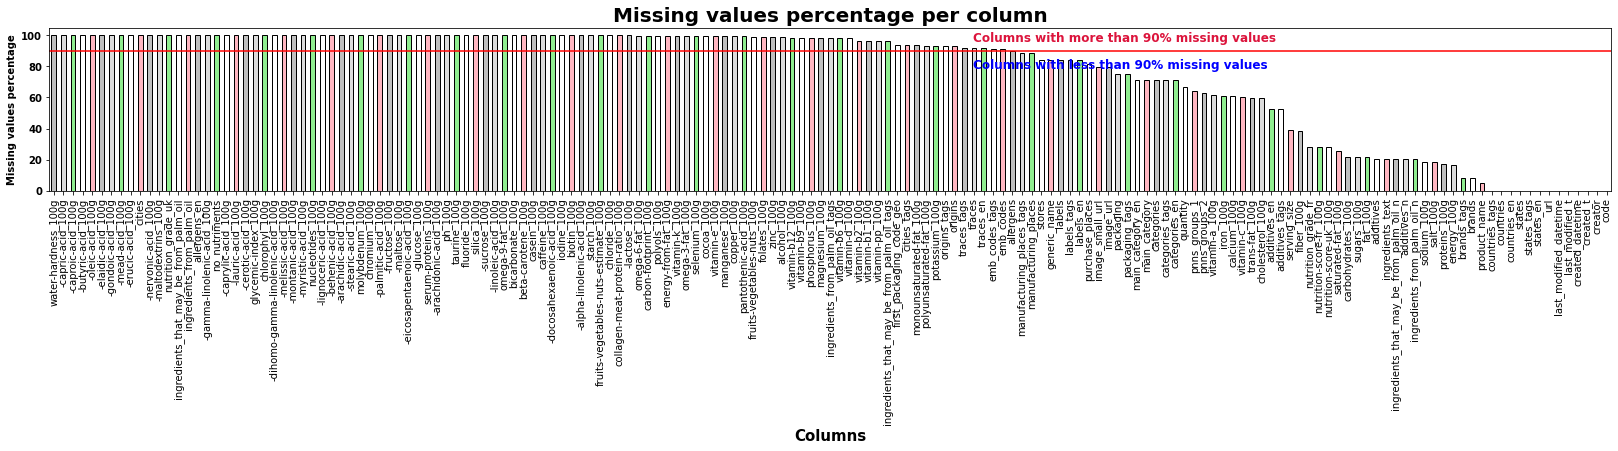

In [325]:
def msv1(data, thresh=20, color='black', edgecolor='black', width=15, height=3):

    plt.figure(figsize=(width,height))
    percentage=(data.isnull().mean())*100
    percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, 'Columns with more than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, 'Columns with less than %s%s missing values' %(thresh, '%'), fontsize=12,weight='bold', color='blue',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage', weight='bold')
    plt.yticks(weight ='bold')
    
    return plt.show()

msv1(df_sample,90, color=('silver', 'gainsboro', 'lightgreen', 'white', 'lightpink'), width=28, height=3)


Retrait des colonnes 90% NA

In [326]:
df_0=df_sample.dropna(thresh=1000, axis=1)

Rajout d'une colonne faisant partie des 90% NA mais qui peut s'averer utile

In [327]:
df_0 = df_0.assign(ingredients_that_may_be_from_palm_oil_tags=df_sample["ingredients_that_may_be_from_palm_oil_tags"].values)

In [328]:
print("Echantillon de base      : {} lignes, {} colonnes.".format(df_sample.shape[0], df_sample.shape[1]))
print("Après retrait des 90% NA : {} lignes, {} colonnes.".format(df_0.shape[0], df_0.shape[1]))

Echantillon de base      : 10000 lignes, 163 colonnes.
Après retrait des 90% NA : 10000 lignes, 64 colonnes.


In [329]:
df_0 = df_0.drop([ 
    'url',
    'creator',
    'created_t',
    'created_datetime',
    'last_modified_t',
    'last_modified_datetime',
], axis=1)

In [330]:
df_0["countries"] = df_0["countries"].apply(
    lambda x: "France" if re.match(r".*(fr).*", str(x), re.IGNORECASE) else x
)

In [331]:
df_1 = df_0[(df_0["countries"] == "France")]

print("Après séléctions lignes France: {} lignes, {} colonnes.".format(df_1.shape[0], df_1.shape[1]))

Après séléctions lignes France: 3628 lignes, 58 colonnes.


In [332]:
list(df_1.columns)

['code',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_en',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_en',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_en',
 'ingredients_text',
 'allergens',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_en',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states',
 'states_tags',
 'states_en',
 'main_category',
 'main_category_en',
 'image_url',
 'image_small_url',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100

In [333]:
df_2 = df_1[
    [
        'product_name',
        'brands',
        'categories',
        'countries',
        'ingredients_text',
        'allergens',
        'nutrition_grade_fr',
        'energy_100g',
        'fat_100g',
        'saturated-fat_100g',
        'carbohydrates_100g',
        'sugars_100g',
        'fiber_100g',
        'proteins_100g',
        'salt_100g',
        'sodium_100g',
        'vitamin-a_100g',
        'vitamin-c_100g',
        'calcium_100g',
        'iron_100g'
    ]
]
df_2.shape

(3628, 20)

In [338]:
df_2 = df_2[~df_2.product_name.isna()]


In [335]:
df_2.sample(5)

,product_name,brands,categories,countries,ingredients_text,allergens,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
227407,Steaks hachés Pur boeuf,Franprix Bio,Steaks hâchés de boeuf surgelés,France,100% pure viande bovine issue de l'agriculture...,NaN,c,864.0,15.0,6.2,0.2,0.2,NaN,18.0,0.15,0.059055,NaN,NaN,NaN,NaN
233428,Pur jus de Citron,Fizz,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270981,Pretzel recette norvégienne,Starbucks,"Sandwichs,Sandwichs au poisson",France,"pain spécial 46,6% (farine de blé, eau, huile ...",NaN,d,997.0,10.3,4.3,25.6,2.5,NaN,8.4,1.80,0.708661,NaN,NaN,NaN,NaN
228335,Cuisses de grenouilles,Leader Price,"Cuisses de grenouilles,Surgelé",France,Cuisses de grenouilles.,NaN,a,284.0,0.0,0.0,0.0,0.0,NaN,16.0,0.14,0.055118,NaN,NaN,NaN,NaN
272962,Petits sables,La Bien nommee,NaN,France,"farine de froment (giuten), beurre frais (28%)...",NaN,e,1979.0,24.7,17.8,56.9,23.0,NaN,5.1,0.80,0.314961,NaN,NaN,NaN,NaN


In [337]:
df_2.to_csv("data/02_intermediate/openfoodfacts_df_2.csv")